In [1]:
import config
import utils

import json
import pickle
import os
import random
import numpy as np

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.patches as patches

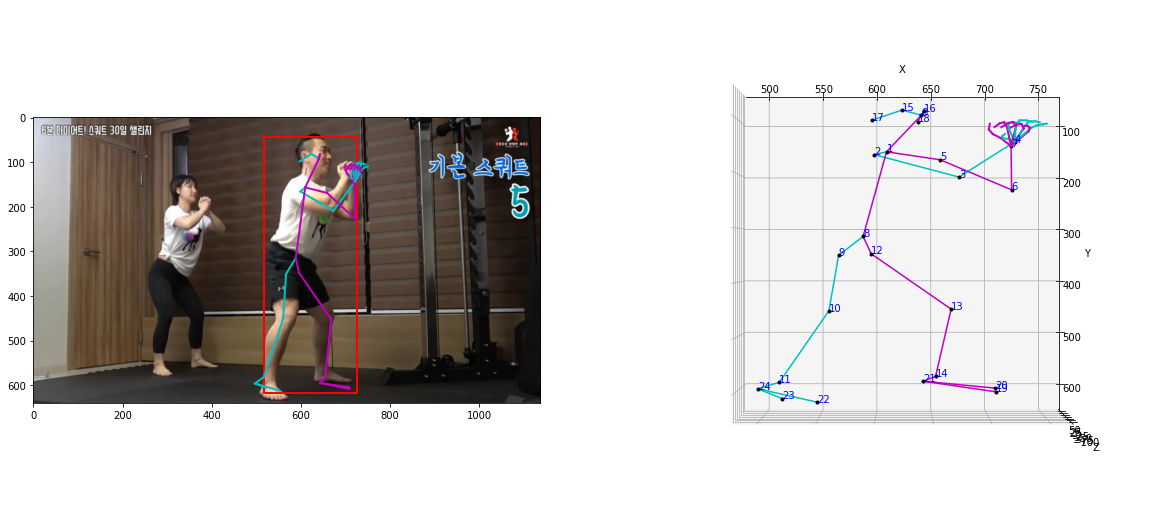

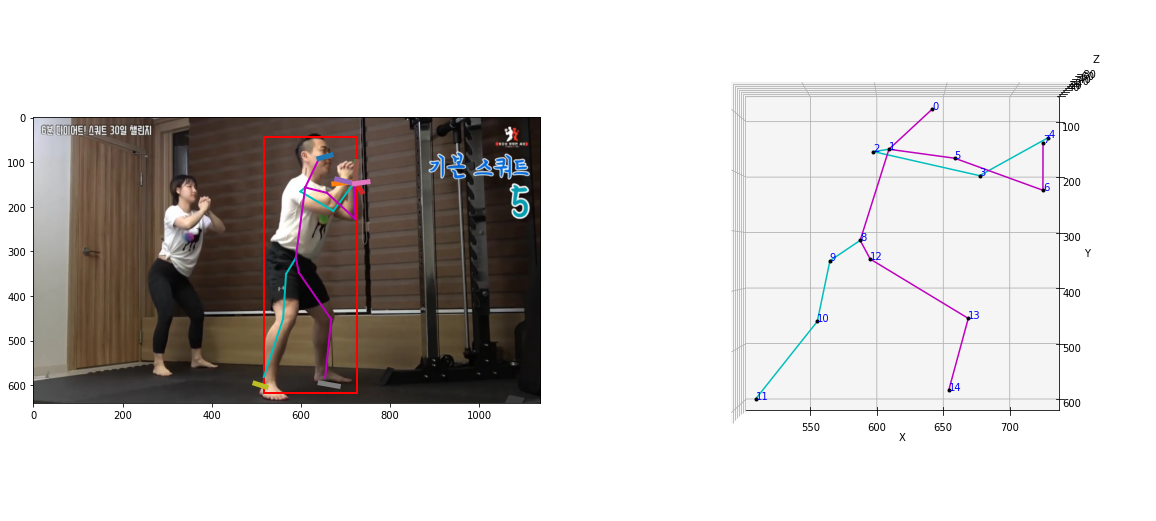

In [2]:
video_idx = [v_idx for v_idx in os.listdir(config.mocap_dir) if v_idx[0]!='.']

for v_idx in video_idx:
    pkl_dir = os.path.join(config.skeleton_pkl_dir, v_idx)
    npz_dir = os.path.join(config.skeleton_npz_dir, v_idx)
    
    pkl_list = os.listdir(pkl_dir)
    npz_list = os.listdir(npz_dir)
    
    # sample one example
    random_fp = random.choice(pkl_list)
    img_fp = os.path.join(config.image_dir, v_idx, random_fp[:-4]+'.jpg')
    img = plt.imread(img_fp)
    
    curr_pkl = pickle.load(open(os.path.join(pkl_dir, random_fp), 'rb'))
    curr_npz = np.load(os.path.join(npz_dir, random_fp.replace('pkl', 'npz')))
    
    ### [PKL] Plot 2D result
    fig = plt.figure(figsize=(20, 10))
    ax_1 = fig.add_subplot(121)
    ax_1.imshow(img)
    utils.plot_2D(curr_pkl['open_pose'], config.open_pose_dict, 
                  curr_pkl['left_hand'], curr_pkl['right_hand'], config.hand_dict,
                  curr_pkl['body_bbox'], ax_1)
    
    
    ### [PKL] Plot 3D result
    ax_2 = fig.add_subplot(122, projection='3d')

    utils.plot_3D(curr_pkl['open_pose'], curr_pkl['left_hand'], curr_pkl['right_hand'],
                  config.open_pose_dict, config.hand_dict, ax_2)

    
    ### [NPZ] Plot 2D result
    # NPZ files contain just simplified version of extracted skeletons.    
    # 0  ~ 45 : pose that was 15 by 3
    # 45 ~ 51 : head pos(3), vec(3)
    # 51 ~ 63 : left hand thumb vector(3), index vector(3), palm vector(3), wrist pos(3)
    # 63 ~ 75 : right hand thumb vector(3), index vector(3), palm vector(3), wrist pos(3)
    # 75 ~ 87 : left heel pos (3), left foot vec (3), right heel pos (3), right foot vec (3)

    pose_array = curr_npz['arr_0']
    body_pose = pose_array[:45]
    head_info = {'pos': pose_array[45:48], 'vec': pose_array[48:51]}
    
    left_hand_info = {'thumb': pose_array[51:54], 'index': pose_array[54:57], 'palm': pose_array[57:60], 
                      'pos': pose_array[60:63]}
    right_hand_info = {'thumb': pose_array[63:66], 'index': pose_array[66:69], 'palm': pose_array[69:72], 
                       'pos': pose_array[72:75]}

    left_heel_info = {'pos': pose_array[75:78], 'vec': pose_array[78:81]}
    right_heel_info = {'pos': pose_array[81:84], 'vec': pose_array[84:87]}
    
    ### [NPZ] Plot 2D result
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(121)
    ax.imshow(img)
    utils.plot_2D(pose_array[:45], config.simple_pose_dict, 
                  list(), list(), None,
                  pose_array[87:91], ax, draw_hand=False)

    utils.plot_head_info(head_info, ax)
    utils.plot_hand_info(right_hand_info, ax)
    utils.plot_hand_info(left_hand_info, ax)
    utils.plot_heel_info(left_heel_info, right_heel_info, ax)
    
    ### [NPZ] Plot 3D result
    ax = fig.add_subplot(122, projection='3d')

    utils.plot_3D(body_pose, [], [],
                  config.simple_pose_dict, {}, ax, draw_hand=False)